In [3]:
import pandas as pd
# Cargar los archivos CSV
df_analisis = pd.read_csv('./serie_a_analizar.csv', sep=";")
df_analisis

,Unnamed: 0,Fecha,Sum_uxt_motivos_2,Sum_uxt_motivos_3,Sum_uxt_motivos_4,#uxt_motivos_2,#uxt_motivos_3,#uxt_motivos_4,uxt_mensual,disp_p,disp_f,disp_final
0,0,2013-01-01,7474.0,1421.0,2681.0,9,9,4,10902576.0,0.999184,0.999754,0.999640
1,1,2013-02-01,3319.0,531.0,1840.0,12,1,4,9847488.0,0.999609,0.999813,0.999772
2,2,2013-03-01,2991.0,2152.0,2110.0,10,4,5,10902576.0,0.999528,0.999806,0.999751
3,3,2013-04-01,22.0,5978.0,3379.0,1,7,5,10550880.0,0.999431,0.999680,0.999630
4,4,2013-05-01,1009.0,4332.0,8231.0,2,9,9,10902576.0,0.999510,0.999245,0.999298
...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2024-01-01,0.0,7689.0,8744.0,0,12,4,10902576.0,0.999295,0.999198,0.999217
133,133,2024-02-01,13289.0,11269.0,1779.0,8,8,4,10199184.0,0.997592,0.999826,0.999379
134,134,2024-03-01,0.0,37340.0,1262.0,0,25,7,10902576.0,0.996575,0.999884,0.999222
135,135,2024-04-01,0.0,47555.0,188.0,0,27,1,10550880.0,0.995493,0.999982,0.999084


In [17]:
! pip install -q yfinance
! pip install -q pandas_market_calendars
! pip install -q statsmodels
! pip install -q numpy==1.26.4
! pip install -q matplotlib



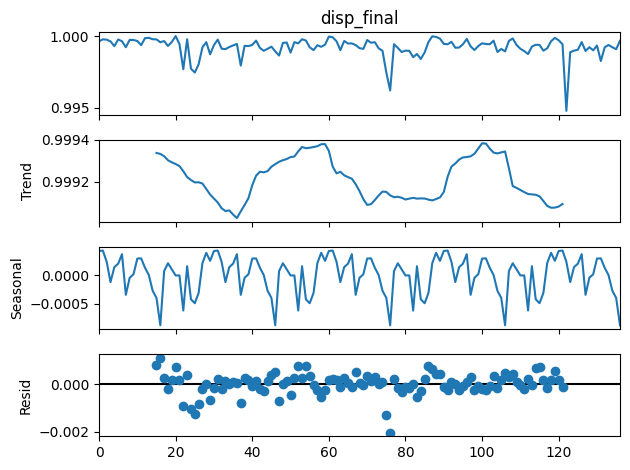

In [27]:

# Modulo para uso exclusivo aqui
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


# Realizar la descomposición estacional aditiva
result = seasonal_decompose(df_analisis['disp_final'], model='additive' , period=30)## corresponde a los dias laborables

# Graficar los resultados
result.plot()
plt.show()

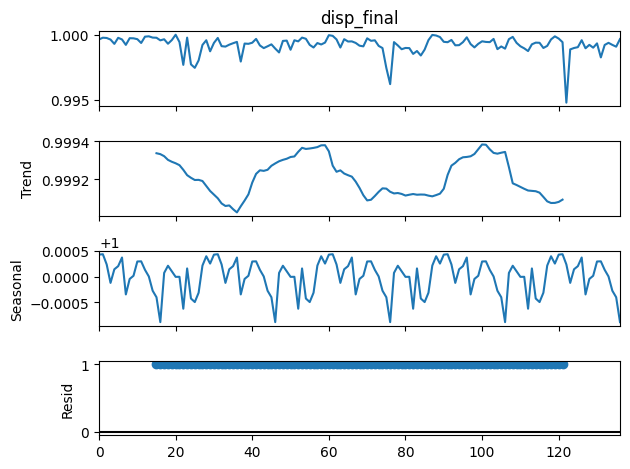

In [28]:
# Realizar la descomposición estacional multiplicativa


result = seasonal_decompose(df_analisis['disp_final'], model='multiplicative' , period=30)

# Graficar los resultados
result.plot()
plt.show()

In [30]:
# Modulo para uso exclusivo a partir de aqui
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

import matplotlib.pyplot
matplotlib.rcParams['figure.figsize']=[6.0,4.0]

### Grafico de autorrelación

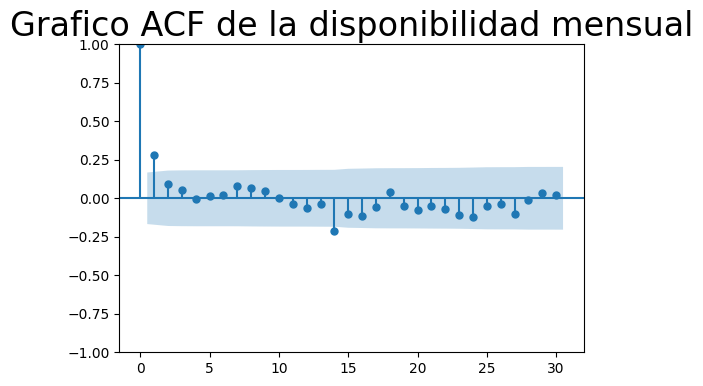

In [34]:
plot_acf(df_analisis['disp_final'],lags=30)
plt.title("Grafico ACF de la disponibilidad mensual", size= 24)
plt.show()

### Grafico de autocorrelación parcial

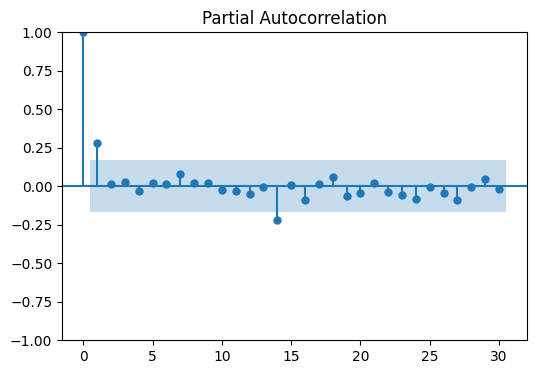

In [59]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


plot_pacf(df_analisis['disp_final'],lags=30);

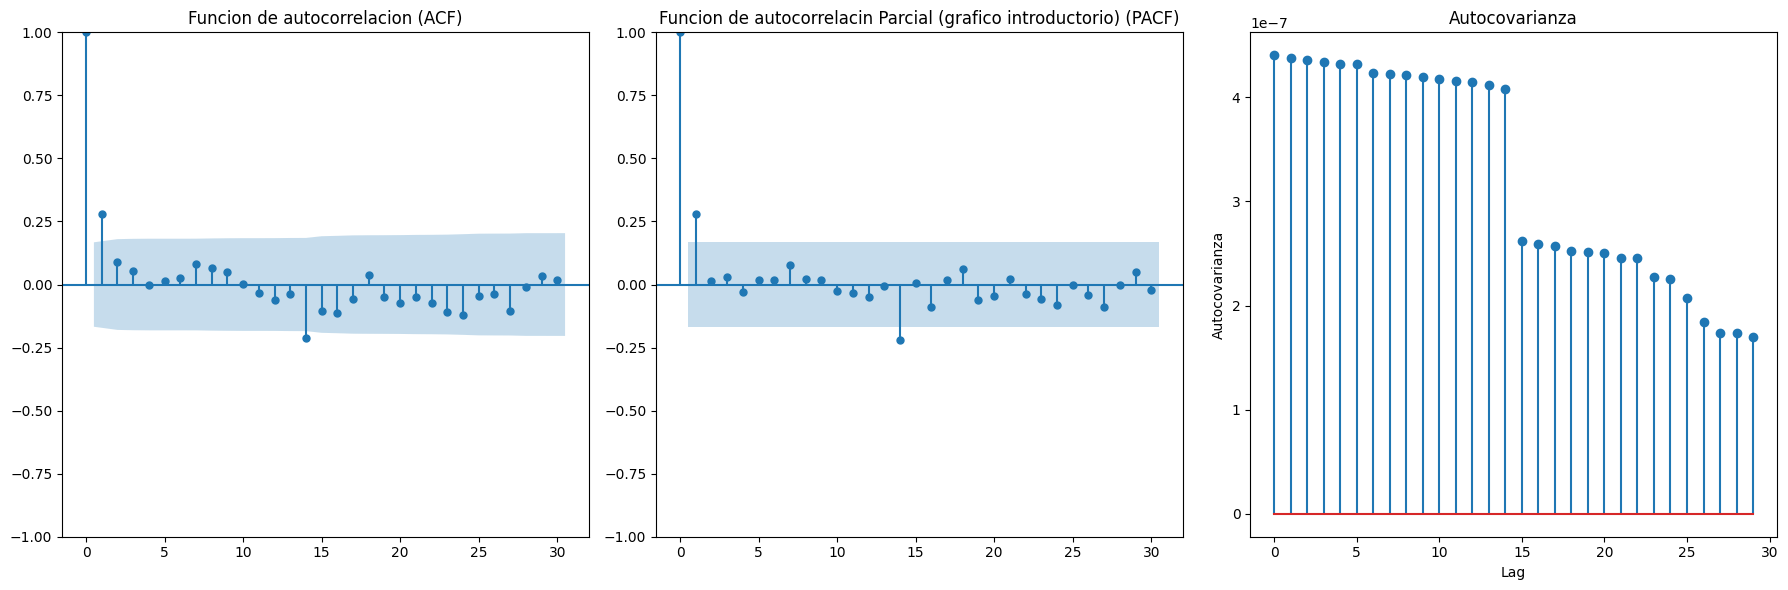

In [64]:
# Grafica de ACF, PACF y autocovarianza

Y = df_analisis['disp_final']

fig, ax = plt.subplots(1, 3, figsize=(18, 6))


sm.graphics.tsa.plot_acf(Y, lags=30, ax=ax[0])
ax[0].set_title('Funcion de autocorrelacion (ACF)')

sm.graphics.tsa.plot_pacf(Y, lags=30, ax=ax[1])
ax[1].set_title('Funcion de autocorrelacin Parcial (grafico introductorio) (PACF)')

def autocovariance(series, lag):
    series_mean = np.mean(series)
    n = len(series)
    return np.sum((series[:n-lag] - series_mean) * (series[lag:] - series_mean)) / n

lags = np.arange(30)
autocov = [autocovariance(Y, lag) for lag in lags]


ax[2].stem(lags, autocov)#, use_line_collection=any)
ax[2].set_title('Autocovarianza')
ax[2].set_xlabel('Lag')
ax[2].set_ylabel('Autocovarianza')

plt.tight_layout()
plt.show()


### generamos un modelo AR(1)

In [39]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [40]:
Y = df_analisis['disp_final']
modeloAR1 = sm.tsa.arima.ARIMA(Y, order=(1,0,0))
resultadosAR1 = modeloAR1.fit()

resultadosAR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             disp_final   No. Observations:                  137
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 813.654
Date:                Fri, 21 Jun 2024   AIC                          -1621.308
Time:                        23:46:25   BIC                          -1612.548
Sample:                             0   HQIC                         -1617.748
                                - 137                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9992      0.000   7956.222      0.000       0.999       0.999
ar.L1          0.2793      0.059      4.767      0.000       0.164       0.394
sigma2      4.062e-07   2.45e-08     16.556      0.000    3.58e-07    4.54e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2194.22
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.70   Skew:                            -3.41
Prob(H) (two-sided):                  0.07   Kurtosis:                        21.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Se puede concluir que no hay evidencia significativa de autocorrelación en los residuos. Se puede pensar que concluir que no estan correlacionados


In [42]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import numpy as np
from statsmodels.tsa.stattools import acf, q_stat
import matplotlib.pyplot as plt

# Suponiendo que df_analisis ya está cargado y tiene la columna 'disp_final'
series = df_analisis['disp_final']

# Ajustar un modelo AR (usando AutoReg para un modelo AR1)
model = AutoReg(series, lags=1).fit()

# Mostrar el resumen del modelo
print(model.summary())


                            AutoReg Model Results                             
Dep. Variable:             disp_final   No. Observations:                  137
Model:                     AutoReg(1)   Log Likelihood                 807.446
Method:               Conditional MLE   S.D. of innovations              0.001
Date:                Sat, 22 Jun 2024   AIC                          -1608.891
Time:                        00:39:37   BIC                          -1600.153
Sample:                             1   HQIC                         -1605.340
                                  137                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7201      0.082      8.751      0.000       0.559       0.881
disp_final.L1     0.2793      0.082      3.392      0.001       0.118       0.441
                                    Root

In [47]:
# Calcular los residuos
residuales = model.resid

# Calcula las autocorrelaciones de los residuos hasta el retardo m
m = 10
acf_values = acf(residuales, nlags=m)

# Calcula la estadística Q y los p-valores para el test de Ljung-Box
q_stat_values, p_values = q_stat(acf_values[1:m+1], len(residuales))

# Mostrando los resultados
print("Estadísticas Q:", q_stat_values)
print("P-valores:", p_values)

# Nivel de significancia
alpha = 0.01

# Decisión de rechazo
for i, p_value in enumerate(p_values):
    if p_value < alpha:
        print(f"Para el retardo {i+1}, rechazamos H0 (p-valor: {p_value})")
    else:
        print(f"Para el retardo {i+1}, no rechazamos H0 (p-valor: {p_value})")


Estadísticas Q: [0.00667481 0.00713428 0.18400157 0.26156501 0.26622229 0.26986897
 1.00332041 1.14406203 1.30980572 1.31246675]
P-valores: [0.93488568 0.99643922 0.98012971 0.99215828 0.99823053 0.99962982
 0.9947748  0.99716417 0.9983272  0.99941043]
Para el retardo 1, no rechazamos H0 (p-valor: 0.9348856807294803)
Para el retardo 2, no rechazamos H0 (p-valor: 0.9964392168534286)
Para el retardo 3, no rechazamos H0 (p-valor: 0.9801297093388351)
Para el retardo 4, no rechazamos H0 (p-valor: 0.9921582784035036)
Para el retardo 5, no rechazamos H0 (p-valor: 0.9982305305424003)
Para el retardo 6, no rechazamos H0 (p-valor: 0.9996298174063328)
Para el retardo 7, no rechazamos H0 (p-valor: 0.994774795674356)
Para el retardo 8, no rechazamos H0 (p-valor: 0.9971641662110253)
Para el retardo 9, no rechazamos H0 (p-valor: 0.9983272021924253)
Para el retardo 10, no rechazamos H0 (p-valor: 0.9994104289174884)


### generamos un modelo MA 1

In [68]:
! pip install -q pmdarima seaborn

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


from pmdarima.arima import auto_arima
plt.rcParams['figure.figsize'] = (10, 5)
from statsmodels.tsa.arima_process import ArmaProcess

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7701daa45e10>
Traceback (most recent call last):
  File "/home/hugo/Documentos/Series_temporales/tp_serie_tiempo/.env_st1/lib/python3.10/site-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/home/hugo/Documentos/Series_temporales/tp_serie_tiempo/.env_st1/lib/python3.10/site-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/home/hugo/Documentos/Series_temporales/tp_serie_tiempo/.env_st1/lib/python3.10/site-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /home/hugo/Documentos/Series_temporales/tp_serie_tiempo/.en

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject